In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
def make_data(i, road_name):
    data = pd.read_csv(f"Seoul_2024/Seoul{i:02d}.csv")
    data['일자'] = pd.to_datetime(data['일자'], format='%Y%m%d')
    data.fillna(0, inplace=True)

    for i in range(24):
        if data[f"{i}시"].dtype!="float":
            data[f"{i}시"] = data[f"{i}시"].map(lambda x: float(str(x).replace(",", "").split()[0]))

    data_weather = pd.read_csv("Seoul_2024/Weather.csv")
    data_weather['날짜'] = pd.to_datetime(data_weather["날짜"])
    data_weather.fillna(0, inplace=True)

    data1 = data[data['지점명']==road_name]
    data_np = np.zeros((data1.shape[0]//2, 24))
    labels = np.zeros((data1.shape[0]//2, 2))

    day_to_num = {"일":0, "월":1, "화":1, "수":1, "목":1, "금":1, "토":0}
    
    for i in range(data1.shape[0]//2):
        labels[i,0] = day_to_num[data1.iloc[i]["요일"]]
        labels[i,1] = data_weather[data_weather['날짜']==data1['일자'].iloc[i]]["강수량(mm)"].iloc[0]
        for j in range(24):
            data_np[i,j] = data1.iloc[i][f"{j}시"]
    
    return data_np, labels

In [4]:
data = pd.read_csv(f"Seoul_2024/Seoul01.csv")
road_list = data['지점명'].unique()

In [5]:
data_np = []
labels_np = []
for i in range(9):
    data_tp, labels = make_data((i+1), "올림픽대로(강일IC)")
    data_np.append(data_tp)
    labels_np.append(labels)
data_np = np.concatenate(data_np)
labels_np = np.concatenate(labels_np)

C:\Users\ilese\AppData\Local\Temp\ipykernel_26480\4280426490.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(0, inplace=True)


In [7]:
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data_np)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_res = pca.fit_transform(data_scaled)
pca_res

array([[ 4.89196542e-01, -3.34139819e+00,  1.00139067e+00,
         1.01384250e+00, -9.04743416e-01],
       [-7.14276834e-02,  1.55405799e+00, -1.26741459e+00,
         5.94464461e-01, -7.85659467e-02],
       [-3.93946952e-03,  1.79725627e+00, -6.94033062e-01,
         6.39791954e-01, -1.52287828e-01],
       ...,
       [ 4.38410801e+00, -3.48938631e-01,  2.87775163e+00,
        -1.74139629e-01,  2.23835469e-02],
       [ 2.78970191e+00, -2.22877933e+00,  1.87404005e+00,
        -1.97625160e-01,  4.10367711e-01],
       [ 3.37039133e+00,  1.64574470e+00,  5.91154470e-01,
        -1.07069798e+00,  5.41286130e-02]])

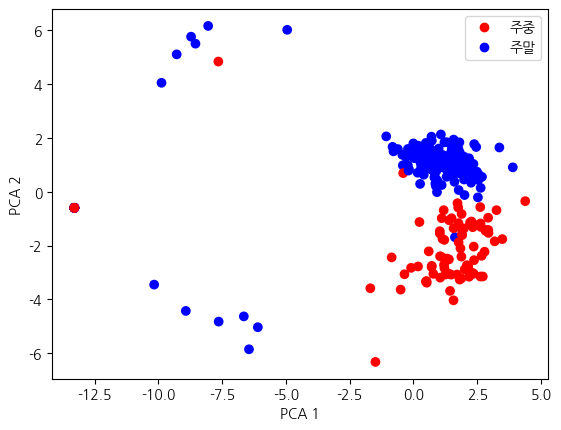

In [9]:
from matplotlib.colors import ListedColormap
classes = ["주중", "주말"]
colors = ListedColormap(['r','b'])
scatter = plt.scatter(pca_res[:,0], pca_res[:,1], c=labels_np[:,0], cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

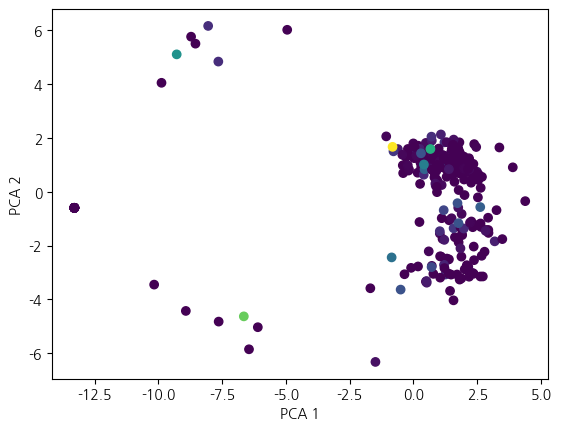

In [10]:
from matplotlib.colors import ListedColormap

classes = ["강수", "강수X"]
colors = ListedColormap(['r','b'])
scatter = plt.scatter(pca_res[:,0], pca_res[:,1], c=labels_np[:,1])
# plt.legend(handles=scatter.legend_elements()[0])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Text(0.5, 1.0, '2024-01-10 강변북로(가양대교북단->난지IC) 교통량')

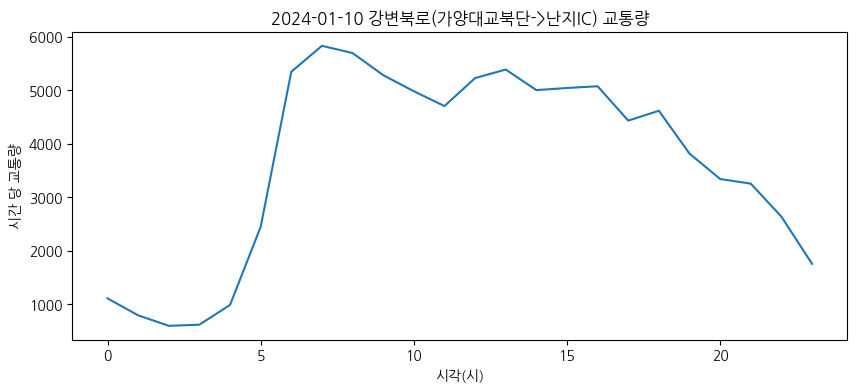

In [11]:
plt.figure(figsize=(10,4))
plt.plot(data_np[9])
plt.xlabel("시각(시)")
plt.ylabel("시간 당 교통량")
plt.title("2024-01-10 강변북로(가양대교북단->난지IC) 교통량")

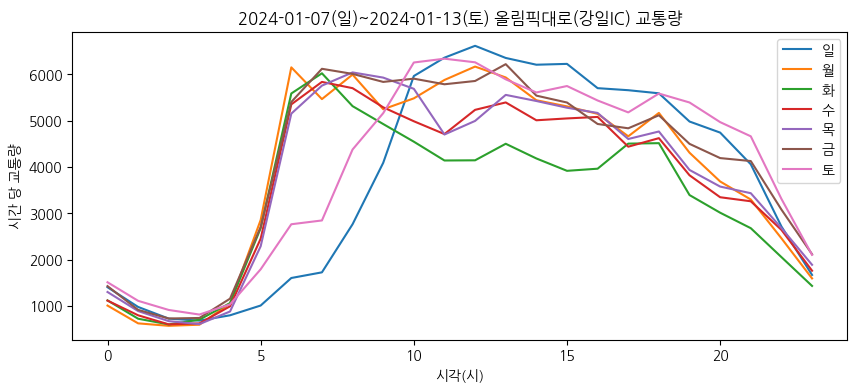

In [12]:
plt.figure(figsize=(10,4))
plt.plot(data_np[6], label="일")
plt.plot(data_np[7], label="월")
plt.plot(data_np[8], label="화")
plt.plot(data_np[9], label="수")
plt.plot(data_np[10], label="목")
plt.plot(data_np[11], label="금")
plt.plot(data_np[12], label="토")
plt.legend()
plt.xlabel("시각(시)")
plt.ylabel("시간 당 교통량")
plt.title("2024-01-07(일)~2024-01-13(토) 올림픽대로(강일IC) 교통량")
plt.show()

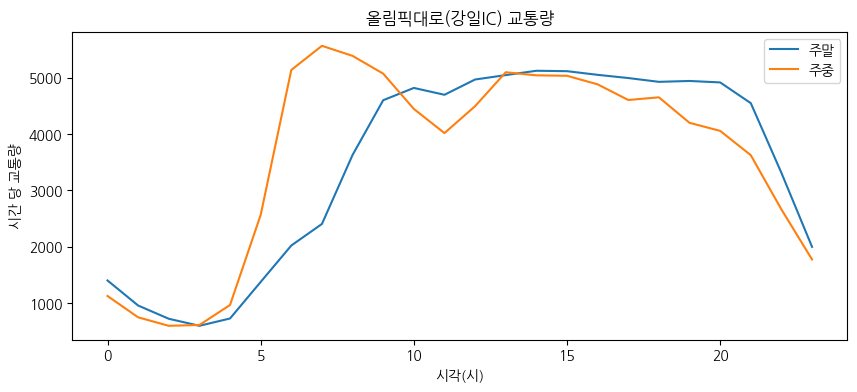

In [13]:
weekday_mean = np.zeros(24)
weekend_mean = np.zeros(24)
daycnt = 0
endcnt = 0
for i in range(data_np.shape[0]):
    if labels_np[i,0]==0:
        weekday_mean += data_np[i]
        daycnt += 1
    else:
        weekend_mean += data_np[i]
        endcnt += 1
weekday_mean /= daycnt
weekend_mean /= endcnt

plt.figure(figsize=(10,4))
plt.plot(weekday_mean, label="주말")
plt.plot(weekend_mean, label="주중")
plt.xlabel("시각(시)")
plt.ylabel("시간 당 교통량")
plt.legend()
plt.title("올림픽대로(강일IC) 교통량")
plt.show()

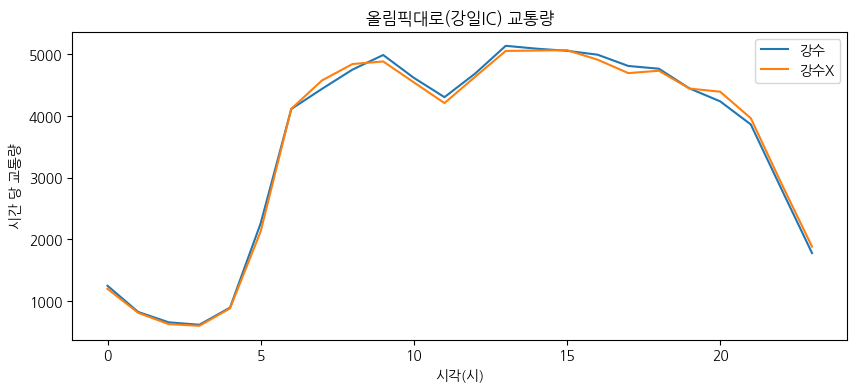

In [165]:
weekday_mean = np.zeros(24)
weekend_mean = np.zeros(24)
daycnt = 0
endcnt = 0
for i in range(data_np.shape[0]):
    if labels_np[i,1]>0:
        weekday_mean += data_np[i]
        daycnt += 1
    else:
        weekend_mean += data_np[i]
        endcnt += 1
weekday_mean /= daycnt
weekend_mean /= endcnt

plt.figure(figsize=(10,4))
plt.plot(weekday_mean, label="강수")
plt.plot(weekend_mean, label="강수X")
plt.xlabel("시각(시)")
plt.ylabel("시간 당 교통량")
plt.legend()
plt.title("올림픽대로(강일IC) 교통량")
plt.show()

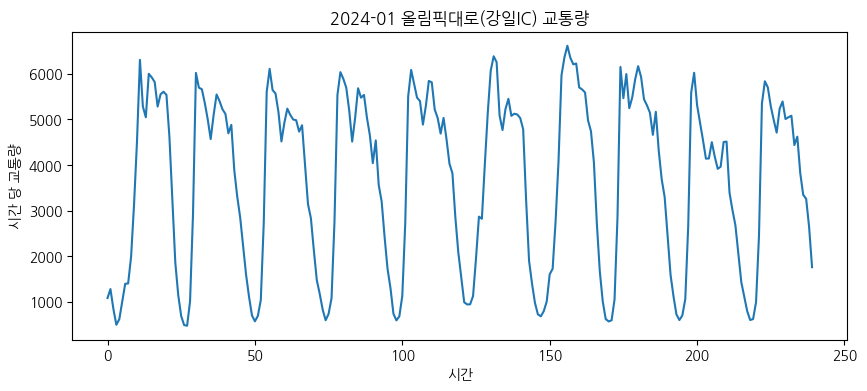

In [14]:
data_con = np.concatenate(data_np[:10])
plt.figure(figsize=(10,4))
plt.plot(data_con)
plt.xlabel("시간")
plt.ylabel("시간 당 교통량")
plt.title("2024-01 올림픽대로(강일IC) 교통량")
plt.show()